In [ ]:
pip install tensorflow

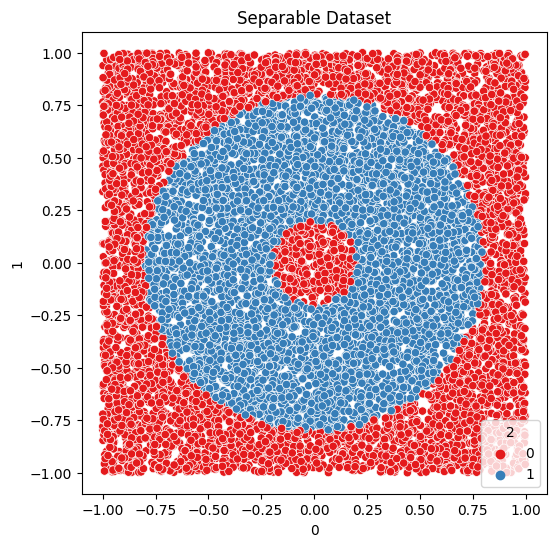

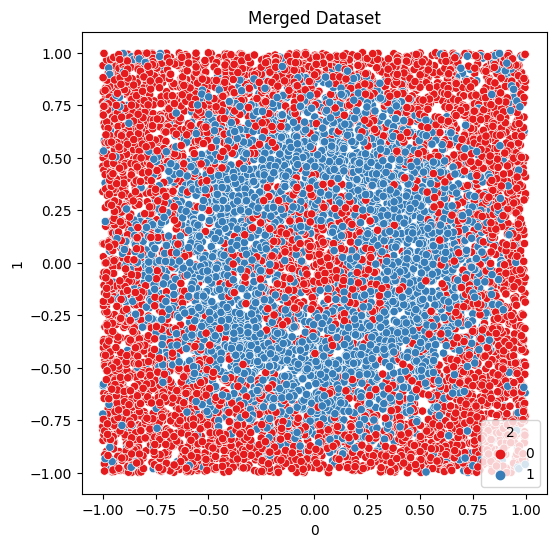

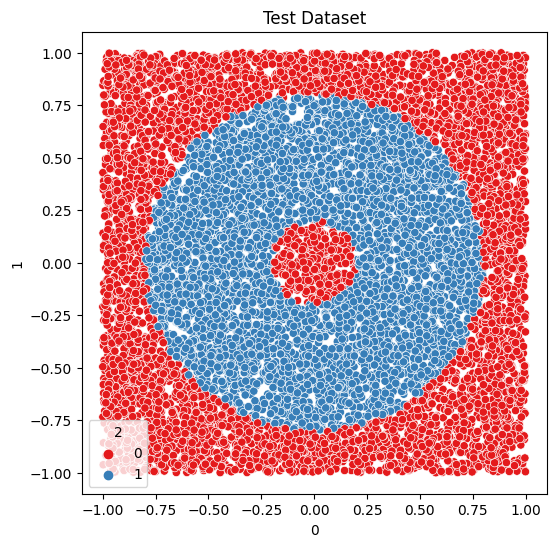

Dataset: Separable Dataset
Missing values:
0    0
1    0
2    0
dtype: int64
Class distribution:
0    5203
1    4797
Name: 2, dtype: int64


Dataset: Merged Dataset
Missing values:
0    0
1    0
2    0
dtype: int64
Class distribution:
0    5515
1    4485
Name: 2, dtype: int64


Dataset: Test Dataset
Missing values:
0    0
1    0
2    0
dtype: int64
Class distribution:
0    5333
1    4667
Name: 2, dtype: int64


Dataset: Separable Dataset
                  0             1             2
count  10000.000000  10000.000000  10000.000000
mean      -0.003277     -0.000642      0.479700
std        0.574481      0.577676      0.499613
min       -0.999944     -0.999873      0.000000
25%       -0.498429     -0.498273      0.000000
50%        0.000014     -0.005922      0.000000
75%        0.490985      0.500586      1.000000
max        0.999516      0.999813      1.000000


Dataset: Merged Dataset
                  0             1             2
count  10000.000000  10000.000000  10000.000000
mean

In [ ]:
import pandas as pd
# Load the first dataset
separable_dataset_path = "A2-ring-separable.txt"

# Load the first dataset with correct separator
separable_dataset = pd.read_csv(separable_dataset_path, sep="\t", header=None)

# Show the first few rows
separable_dataset.head()
# Load the second dataset
merged_dataset_path = "A2-ring-merged.txt"
merged_dataset = pd.read_csv(merged_dataset_path, sep="\t", header=None)

# Load the test dataset
test_dataset_path = "A2-ring-test.txt"
test_dataset = pd.read_csv(test_dataset_path, sep="\t", header=None)

# Show the first few rows of each dataset
merged_dataset.head(), test_dataset.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize the datasets
def plot_dataset(df, title):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=df[0], y=df[1], hue=df[2], palette="Set1")
    plt.title(title)
    plt.show()

# Visualize the datasets
plot_dataset(separable_dataset, 'Separable Dataset')
plot_dataset(merged_dataset, 'Merged Dataset')
plot_dataset(test_dataset, 'Test Dataset')

# Function to check for missing values and class distributions
def check_data(df, name):
    print(f"Dataset: {name}")
    print("Missing values:")
    print(df.isnull().sum())
    print("Class distribution:")
    print(df[2].value_counts())
    print("\n")

# Check the datasets
check_data(separable_dataset, 'Separable Dataset')
check_data(merged_dataset, 'Merged Dataset')
check_data(test_dataset, 'Test Dataset')

# Function to examine the descriptive statistics of a dataset
def describe_data(df, name):
    print(f"Dataset: {name}")
    print(df.describe())
    print("\n")

# Describe the datasets
describe_data(separable_dataset, 'Separable Dataset')
describe_data(merged_dataset, 'Merged Dataset')
describe_data(test_dataset, 'Test Dataset')




In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Function to apply SVM and perform cross-validation
def apply_svm(X_train, y_train, X_test, y_test):
    # Define parameter grid
    param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}

    # Create SVM classifier with 'rbf' kernel
    svm = SVC(kernel='rbf')

    # Perform cross-validation to find best parameters
    grid = GridSearchCV(svm, param_grid, cv=3)
    grid.fit(X_train, y_train)

    # Print best parameters
    print("Best parameters: ", grid.best_params_)

    # Evaluate the SVM on the test set
    y_pred = grid.predict(X_test)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

    return grid

# Separate features and target for each dataset
X_sep = separable_dataset[[0, 1]]
y_sep = separable_dataset[2]
X_mer = merged_dataset[[0, 1]]
y_mer = merged_dataset[2]
X_test = test_dataset[[0, 1]]
y_test = test_dataset[2]

# Apply SVM to separable dataset
print("Separable Dataset")
grid_sep = apply_svm(X_sep, y_sep, X_test, y_test)

# Apply SVM to merged dataset
print("\nMerged Dataset")
grid_mer = apply_svm(X_mer, y_mer, X_test, y_test)


Separable Dataset
Best parameters:  {'C': 10, 'gamma': 1}
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5333
           1       0.98      1.00      0.99      4667

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion matrix:
[[5234   99]
 [   6 4661]]
ROC AUC Score:  0.9900753586578483

Merged Dataset
Best parameters:  {'C': 10, 'gamma': 1}
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5333
           1       0.93      0.99      0.96      4667

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion matrix:
[[4967  366]
 [  29 4638]]
ROC AUC Score:  0.9625784344004895


In [ ]:

# Function to apply SVM without cross-validation
def apply_svm_simple(X_train, y_train, X_test, y_test):
    # Create SVM classifier with 'rbf' kernel
    svm = SVC(kernel='rbf', C=1, gamma='scale')

    # Train the model
    svm.fit(X_train, y_train)

    # Evaluate the SVM on the test set
    y_pred = svm.predict(X_test)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

    return svm

# Apply SVM to separable dataset
print("Separable Dataset")
svm_sep = apply_svm_simple(X_sep, y_sep, X_test, y_test)

# Apply SVM to merged dataset
print("\nMerged Dataset")
svm_mer = apply_svm_simple(X_mer, y_mer, X_test, y_test)


Separable Dataset
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5333
           1       0.95      1.00      0.98      4667

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion matrix:
[[5108  225]
 [  11 4656]]
ROC AUC Score:  0.9777264443073117

Merged Dataset
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5333
           1       0.93      0.98      0.96      4667

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion matrix:
[[4999  334]
 [  74 4593]]
ROC AUC Score:  0.960757537703938


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
def load_data(file_path):
    data = np.loadtxt(file_path)
    X, y = data[:, :-1], data[:, -1]
    return X, y

# Load the datasets
X_mer, y_mer = load_data("A2-ring-merged.txt")
X_sep, y_sep = load_data("A2-ring-separable.txt")
X_test, y_test = load_data("A2-ring-test.txt")

# Split the data into training and test sets for merged dataset
X_train_mer, X_val_mer, y_train_mer, y_val_mer = train_test_split(X_mer, y_mer, test_size=0.2, random_state=42)

# Function to apply back-propagation
def apply_bp(X_train, y_train, X_test, y_test):
    # Create a neural network model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # hidden layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    # Evaluate the model on the test set
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: ", accuracy)

    # Predict the classes
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

    return model

# Apply BP to merged dataset
print("Merged Dataset")
bp_mer = apply_bp(X_train_mer, y_train_mer, X_val_mer, y_val_mer)

# Function to apply MLR and convert predictions into class labels
def apply_mlr(X_train, y_train, X_test, y_test):
    # Create a linear regression model
    mlr = LinearRegression()

    # Train the model
    mlr.fit(X_train, y_train)

    # Make predictions
    y_pred_cont = mlr.predict(X_test)

    # Convert continuous predictions into class labels using a threshold
    threshold = 0.5
    y_pred = (y_pred_cont > threshold).astype("int32")

    # Calculate and print accuracy
    accuracy = np.mean(y_pred == y_test)
    print("Accuracy: ", accuracy)

    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

    return mlr

# Apply MLR to merged dataset
print("\nMerged Dataset")
mlr_mer = apply_mlr(X_train_mer, y_train_mer, X_val_mer, y_val_mer)


Merged Dataset
Accuracy:  0.7599999904632568
63/63 [==============================] - 0s 2ms/step
Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78      1117
         1.0       0.72      0.76      0.74       883

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

Confusion matrix:
[[851 266]
 [214 669]]
ROC AUC Score:  0.7597532624091183

Merged Dataset
Accuracy:  0.5585
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72      1117
         1.0       0.00      0.00      0.00       883

    accuracy                           0.56      2000
   macro avg       0.28      0.50      0.36      2000
weighted avg       0.31      0.56      0.40      2000

Confusion matrix:
[[1117    0]
 [ 883    0]]
ROC AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Function to apply MLR and convert predictions into class labels
def apply_mlr(X_train, y_train, X_test, y_test):
    # Create a linear regression model
    mlr = LinearRegression()

    # Train the model
    mlr.fit(X_train, y_train)

    # Make predictions
    y_pred_cont = mlr.predict(X_test)

    # Convert continuous predictions into class labels using a threshold
    threshold = 0.5
    y_pred = (y_pred_cont > threshold).astype("int32")

    # Calculate and print accuracy
    accuracy = np.mean(y_pred == y_test)
    print("Accuracy: ", accuracy)

    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

    return mlr

# Apply MLR to merged dataset
print("\nMerged Dataset")
mlr_mer = apply_mlr(X_train_mer, y_train_mer, X_val_mer, y_val_mer)



Merged Dataset
Accuracy:  0.5585
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72      1117
         1.0       0.00      0.00      0.00       883

    accuracy                           0.56      2000
   macro avg       0.28      0.50      0.36      2000
weighted avg       0.31      0.56      0.40      2000

Confusion matrix:
[[1117    0]
 [ 883    0]]
ROC AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
def load_data(file_path):
    data = np.loadtxt(file_path)
    X, y = data[:, :-1], data[:, -1]
    return X, y

# Load the separable dataset
X_sep, y_sep = load_data("A2-ring-separable.txt")

# Split the data into training and validation sets for the separable dataset
X_train_sep, X_val_sep, y_train_sep, y_val_sep = train_test_split(X_sep, y_sep, test_size=0.2, random_state=42)

# Function to apply back-propagation
def apply_bp(X_train, y_train, X_val, y_val):
    # Create a neural network model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # hidden layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print("Accuracy: ", accuracy)

    # Predict the classes
    y_pred = (model.predict(X_val) > 0.5).astype("int32")

    print("Classification report:")
    print(classification_report(y_val, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_val, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_val, y_pred))

    return model

# Apply BP to separable dataset
print("\nSeparable Dataset")
bp_sep = apply_bp(X_train_sep, y_train_sep, X_val_sep, y_val_sep)



Separable Dataset
Accuracy:  0.9505000114440918
63/63 [==============================] - 0s 1ms/step
Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      1051
         1.0       0.93      0.97      0.95       949

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Confusion matrix:
[[985  66]
 [ 33 916]]
ROC AUC Score:  0.9512146091985253
